In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from utils import *

print(torch.cuda.is_available())
print(torch.device('cuda'))
print(torch.cuda.device_count())
print(torch.version.cuda)

True
cuda
3
11.2


In [4]:
# dataset 512
import opendatasets as od
import zipfile

# dataset 1024
import os
import zipfile
import gdown
from sklearn.model_selection import train_test_split

# mask
sys.path.append(os.path.abspath('/root/MAT/'))
from datasets import mask_generator_512, mask_generator_256

# eval
from evaluation import cal_fid_pids_uids, cal_lpips, cal_psnr_ssim_l1
import contextlib

# Others
import glob
import importlib
importlib.reload(cal_fid_pids_uids)
importlib.reload(cal_lpips)
importlib.reload(cal_psnr_ssim_l1)

/root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /root/miniconda3/envs/MAT/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


<module 'evaluation.cal_psnr_ssim_l1' from '../evaluation/cal_psnr_ssim_l1.py'>

### Draft Codes

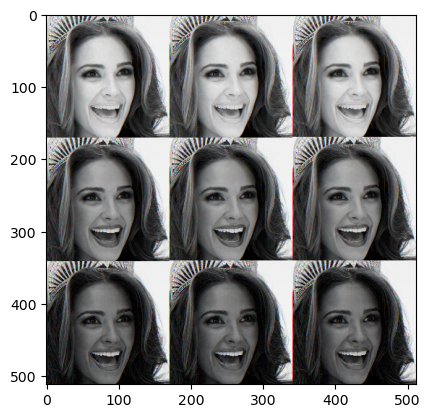

In [52]:
from datasets.dataset_512 import ImageFolderMaskDataset
from torch.utils.data import Dataset, DataLoader

res = 512
res = 512
dpath = '/root/MAT/Data/CelebA-HQ/CelebA-HQ-img'
# dpath = '/root/MAT/test_sets/CelebA-HQ/images4'
D = ImageFolderMaskDataset(path=dpath)
# plt.imshow(next(iter(DataLoader(D, batch_size=1)))[1][0][0])
plt.imshow(np.array(next(iter(DataLoader(D, batch_size=1)))[0][0]).reshape((512, 512, 3)))

In [17]:
sys.path.append(os.path.abspath('/root/MAT/'))
import dnnlib
import legacy
from metrics import metric_main
importlib.reload(metric_main)

# network_pkl = '/root/MAT/pretrained/CelebA-HQ_512.pkl'
network_pkl = '/root/MAT/saved_model/00014-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-kimg400-batch16-tc0.5-sm0.5-ema10-noaug-resumecustom/network-snapshot-000400.pkl'
device = torch.device('cuda:0')
metrics = ['fid2993_full']
rank = 0
num_gpus = 1
dataloader = 'datasets.dataset_512.ImageFolderMaskDataset'
data_val = '/root/MAT/Data/CelebA-HQ/CelebA-HQ-val_img'
val_set_kwargs = dnnlib.EasyDict(class_name=dataloader, path=data_val, use_labels=False, max_size=2993, xflip=False, resolution=512)
print(f'Loading networks from: {network_pkl}')

with dnnlib.util.open_url(network_pkl) as f:
    model = legacy.load_network_pkl(f)
    G = model['G_ema'].to(device).eval().requires_grad_(False) # type: ignore
    D = model['D'].to(device)

print('Evaluating metrics...')
for metric in metrics:
    result_dict = metric_main.calc_metric(metric=metric, G=G,
        dataset_kwargs=val_set_kwargs, num_gpus=num_gpus, rank=rank, device=device)
    if rank == 0:
        metric_main.report_metric(result_dict)
del model # conserve memory

Loading networks from: /root/MAT/saved_model/00014-CelebA-HQ-img-mirror-celeba512-mat-lr0.001-TwoStageLoss-pr0.1-nopl-kimg400-batch16-tc0.5-sm0.5-ema10-noaug-resumecustom/network-snapshot-000400.pkl
Evaluating metrics...
{"results": {"fid2993_full": 5.223027725597561}, "metric": "fid2993_full", "total_time": 197.85693979263306, "total_time_str": "3m 18s", "num_gpus": 1, "snapshot_pkl": null, "timestamp": 1699517958.4219468}
